In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../merged_data.csv')

In [4]:
df.head()

,Zipcode,State,City,Metro,CountyName,Year,GrowthRate,WHITE,BLACK_OR_AFRICAN_AMERICAN,AMERICAN_INDIAN_AND_ALASKA_NATIVE,ASIAN,NATIVE_HAWAIIAN_AND_OTHER_PACIFIC_ISLANDER,HISPANIC_OR_LATINO
0,1001,MA,Agawam,"Springfield, MA",Hampden County,2012,-2.451772,-2.096436,33.333333,0.0,200.000000,0.0,20.512821
1,1001,MA,Agawam,"Springfield, MA",Hampden County,2013,0.973817,-1.177730,-40.000000,0.0,50.000000,100.0,12.765957
2,1001,MA,Agawam,"Springfield, MA",Hampden County,2014,0.441570,0.108342,-8.333333,0.0,7.407407,0.0,11.320755
3,1001,MA,Agawam,"Springfield, MA",Hampden County,2015,1.026204,-0.649351,18.181818,0.0,27.586207,0.0,8.474576
4,1001,MA,Agawam,"Springfield, MA",Hampden County,2016,4.639393,-0.108932,15.384615,-100.0,8.108108,-50.0,17.187500


In [5]:
byCounty = df.drop(['Zipcode', 'State', 'City', 'Metro', 'Year'], axis=1)
byCounty.head()

,CountyName,GrowthRate,WHITE,BLACK_OR_AFRICAN_AMERICAN,AMERICAN_INDIAN_AND_ALASKA_NATIVE,ASIAN,NATIVE_HAWAIIAN_AND_OTHER_PACIFIC_ISLANDER,HISPANIC_OR_LATINO
0,Hampden County,-2.451772,-2.096436,33.333333,0.0,200.000000,0.0,20.512821
1,Hampden County,0.973817,-1.177730,-40.000000,0.0,50.000000,100.0,12.765957
2,Hampden County,0.441570,0.108342,-8.333333,0.0,7.407407,0.0,11.320755
3,Hampden County,1.026204,-0.649351,18.181818,0.0,27.586207,0.0,8.474576
4,Hampden County,4.639393,-0.108932,15.384615,-100.0,8.108108,-50.0,17.187500


In [6]:
byCounty['GrowthRate'].describe()

count    250126.000000
mean          8.033114
std          29.125929
min         -41.724381
25%           2.792479
50%           5.900148
75%          10.377649
max        1271.430934
Name: GrowthRate, dtype: float64

<Axes: >

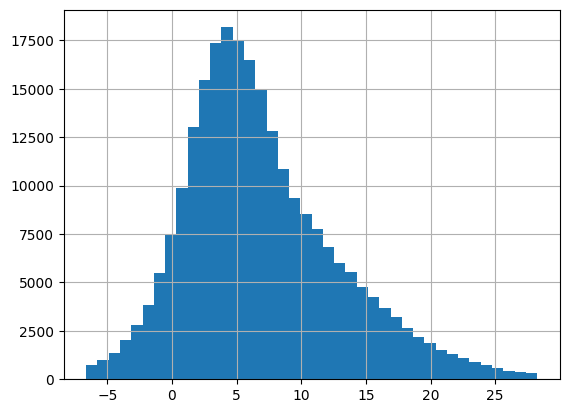

In [7]:
q1 = byCounty['GrowthRate'].quantile(0.01)
q25 = byCounty['GrowthRate'].quantile(0.25)
q75 = byCounty['GrowthRate'].quantile(0.75)
q99 = byCounty['GrowthRate'].quantile(0.99)
byCounty['GrowthRate'][byCounty['GrowthRate'].between(q1, q99)].hist(bins=40)

In [8]:
noCountyDf = byCounty.drop(['CountyName'], axis=1)
noCountyDf.describe()

,GrowthRate,WHITE,BLACK_OR_AFRICAN_AMERICAN,AMERICAN_INDIAN_AND_ALASKA_NATIVE,ASIAN,NATIVE_HAWAIIAN_AND_OTHER_PACIFIC_ISLANDER,HISPANIC_OR_LATINO
count,250126.000000,250126.000000,250126.000000,250126.000000,250126.000000,250126.000000,250126.000000
mean,8.033114,-0.128386,27.042570,22.351745,28.353845,4.950853,45.388669
std,29.125929,207.581875,408.017584,329.726724,326.299069,110.951226,593.300703
min,-41.724381,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
25%,2.792479,-1.829268,-7.500000,-4.444444,-7.142857,0.000000,-7.801418
50%,5.900148,-0.308960,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.377649,0.684932,9.523810,0.000000,11.290323,0.000000,15.217391
max,1271.430934,99900.000000,72500.000000,99900.000000,39900.000000,12400.000000,53300.000000


In [9]:
normalizedMinMaxDf = (noCountyDf - noCountyDf.min() ) / ( noCountyDf.max() - noCountyDf.min() )
normalizedMinMaxDf.describe()

,GrowthRate,WHITE,BLACK_OR_AFRICAN_AMERICAN,AMERICAN_INDIAN_AND_ALASKA_NATIVE,ASIAN,NATIVE_HAWAIIAN_AND_OTHER_PACIFIC_ISLANDER,HISPANIC_OR_LATINO
count,250126.000000,250126.000000,250126.000000,250126.000000,250126.000000,250126.000000,250126.000000
mean,0.037892,0.000999,0.001750,0.001224,0.003209,0.008396,0.002723
std,0.022180,0.002076,0.005620,0.003297,0.008157,0.008876,0.011111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033901,0.000982,0.001274,0.000956,0.002321,0.008000,0.001727
50%,0.036267,0.000997,0.001377,0.001000,0.002500,0.008000,0.001873
75%,0.039677,0.001007,0.001509,0.001000,0.002782,0.008000,0.002158
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
normalizedMeanDf = (noCountyDf - noCountyDf.mean() ) / noCountyDf.std()
normalizedMeanDf.describe()

,GrowthRate,WHITE,BLACK_OR_AFRICAN_AMERICAN,AMERICAN_INDIAN_AND_ALASKA_NATIVE,ASIAN,NATIVE_HAWAIIAN_AND_OTHER_PACIFIC_ISLANDER,HISPANIC_OR_LATINO
count,2.501260e+05,2.501260e+05,2.501260e+05,2.501260e+05,2.501260e+05,2.501260e+05,2.501260e+05
mean,-3.511154e-17,-4.971294e-20,-1.085162e-17,-6.817774e-18,1.690240e-17,-7.726811e-18,3.238443e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.708357e+00,-4.811191e-01,-3.113654e-01,-3.710702e-01,-3.933626e-01,-9.459188e-01,-2.450506e-01
25%,-1.799302e-01,-8.193788e-03,-8.465951e-02,-8.126787e-02,-1.087858e-01,-4.462189e-02,-8.965115e-02
50%,-7.323254e-02,-8.698905e-04,-6.627795e-02,-6.778870e-02,-8.689527e-02,-4.462189e-02,-7.650196e-02
75%,8.049648e-02,3.918058e-03,-4.293629e-02,-6.778870e-02,-5.229412e-02,-4.462189e-02,-5.085327e-02
max,4.337708e+01,4.812565e+02,1.776221e+02,3.029104e+02,1.221936e+02,1.117162e+02,8.975990e+01


In [12]:
toOutput = normalizedMinMaxDf
toOutput.to_csv('discrete_minmaxnorm_dataset.csv', index=False)

In [13]:
normalizedMeanDf.to_csv('discrete_meannorm_dataset.csv', index=False)

In [14]:
noCountyDf.to_csv('discrete_nonorm_dataset.csv', index=False)